<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8.5.Deep_Learning-LSTM(Sliding_Windows)</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

## Seleccionar que tipo de ejecucion se va a realizar:

## AUTOMATICA o MANUAL (por defecto AUTOMATICA).

In [ ]:
# escribir entre parentesis AUTOMATICA o MANUAL

EJECUCION = "AUTOMATICA"

In [ ]:
# en esta celda no ha de ser modificada 

if EJECUCION == "MANUAL":
    %run 3.Importaciones.ipynb
    
%run 4.VariablesClases.ipynb

In [81]:
datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_seg2_standarizado = pd.read_csv('../datos/csv/seg2_stscaler.csv', sep=',')
datosEEG_seg3_standarizado = pd.read_csv('../datos/csv/seg3_stscaler.csv', sep=',')
datosEEG_seg4_standarizado = pd.read_csv('../datos/csv/seg4_stscaler.csv', sep=',')
datosEEG_std_after = pd.read_csv('../datos/csv/all_stscaler_after.csv', sep=',')
datosEEG_std_before = pd.read_csv('../datos/csv/all_stscaler_before.csv', sep=',')


datosEEG_all = [datosEEG_std_after, datosEEG_std_before]
datosEEG_all_nombres = {'all_std_after':datosEEG_std_after, 'all_std_before':datosEEG_std_before}
nombre_clases = valores_key(datosEEG_seg1_standarizado)

# LSTM (Long short-term memory)

In [82]:
train_datos, val_datos, test_datos = dividir_datos_deep(datosEEG_seg4_standarizado, TARGET)


In [83]:
print('Segmento 4')
print(f'train_datos: {train_datos.shape}')
display(train_datos['Key'].value_counts())
print(f'val_datos: {val_datos.shape}')
display(val_datos['Key'].value_counts())
print(f'test_datos: {test_datos.shape}')
display(test_datos['Key'].value_counts())


Segmento 4
train_datos: (158, 11)


Key
0.0    43
1.0    35
4.0    32
2.0    26
3.0    22
Name: count, dtype: int64

val_datos: (32, 11)


Key
0.0    9
1.0    7
4.0    6
3.0    5
2.0    5
Name: count, dtype: int64

test_datos: (8, 11)


Key
4.0    2
0.0    2
1.0    2
2.0    1
3.0    1
Name: count, dtype: int64

In [84]:
#NO SE PUEDEN UTILIZAR LOS SEGMENTOS PORQUE NO TIENEN DATOS SUFICIENTES EN TEST PARA PODER HACER VENTANAS DE UN TAMAÑO MINIMO

In [85]:

train_datos, val_datos, test_datos = dividir_datos_deep(datosEEG_std_after, TARGET)

In [86]:

print('Segmento 4')
print(f'train_datos: {train_datos.shape}')
display(train_datos['Key'].value_counts())
print(f'val_datos: {val_datos.shape}')
display(val_datos['Key'].value_counts())
print(f'test_datos: {test_datos.shape}')
display(test_datos['Key'].value_counts())


Segmento 4
train_datos: (542, 11)


Key
0.0    149
1.0    112
4.0    101
2.0     91
3.0     89
Name: count, dtype: int64

val_datos: (108, 11)


Key
0.0    29
1.0    22
4.0    21
2.0    18
3.0    18
Name: count, dtype: int64

test_datos: (28, 11)


Key
0.0    8
1.0    6
2.0    5
4.0    5
3.0    4
Name: count, dtype: int64

In [87]:
#CON ESTOS DATOS SI SE PUEDEN UTILIZAR PERO LOS DATOS PARA PODER HACER VENTANAS DE UN TAMAÑO MINIMO SERIAN MINIMOS

In [88]:
model_lstm_sw = crear_modelo_LSTM(TIMESTEPS, FEATURES, NUM_CLASES)

C:\Users\Casa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


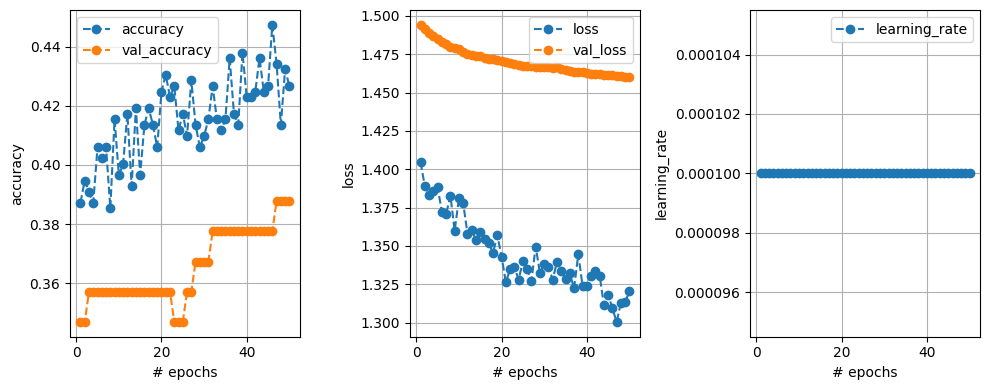

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4609 - loss: 1.2934 - val_accuracy: 0.3878 - val_loss: 1.4602 - learning_rate: 1.0000e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [89]:
accuracy_score_lstm_sw = []
accuracy_score_test_lstm_sw =[]
matriz_confusion_lstm_sw = []
matriz_confusion_test_lstm_sw = []
total_simple_lstm_sw_trained = []

for dataset in datosEEG_all:
       
    train_datos, val_datos, test_datos = dividir_datos_deep(dataset, TARGET)
    
    columns = train_datos.columns[train_datos.columns != TARGET]
    
    X_train, y_train = preparar_ventanas(train_datos[columns], train_datos[TARGET], WINDOWS_SIZE, OVERLAP )
    X_val, y_val = preparar_ventanas(val_datos[columns], val_datos[TARGET], WINDOWS_SIZE, OVERLAP )
    X_test, y_test = preparar_ventanas(test_datos[columns], test_datos[TARGET], WINDOWS_SIZE, OVERLAP )
     
    # Entrenar el modelo
    model_lstm_sw_trained = model_lstm_sw.fit(X_train, y_train, epochs=EPOCHS, batch_size=BACH_SIZE, validation_data= (X_val, y_val), callbacks=[early_stopping, REDUCE_RL, model_checkpoint, plot_learning])
    
    y_pred = model_lstm_sw.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    y_pred_test = model_lstm_sw.predict(X_test)
    y_pred_classes_test = np.argmax(y_pred_test, axis=1)

    accuracy_score_lstm_sw.append(accuracy_score(y_val, y_pred_classes))
    matriz_confusion_lstm_sw.append(confusion_matrix(y_val, y_pred_classes))
    
    accuracy_score_test_lstm_sw.append(accuracy_score(y_test, y_pred_classes_test))
    matriz_confusion_test_lstm_sw.append(confusion_matrix(y_test, y_pred_classes_test))
    
    #simple_rnn_loss, simple_rnn_accuracy = model_srnn.evaluate(X_test, y_test)
    total_simple_lstm_sw_trained.append(model_lstm_sw_trained)

,LSTM_SW_VAL
All Segmentos after,0.306122
All Segmentos before,0.387755


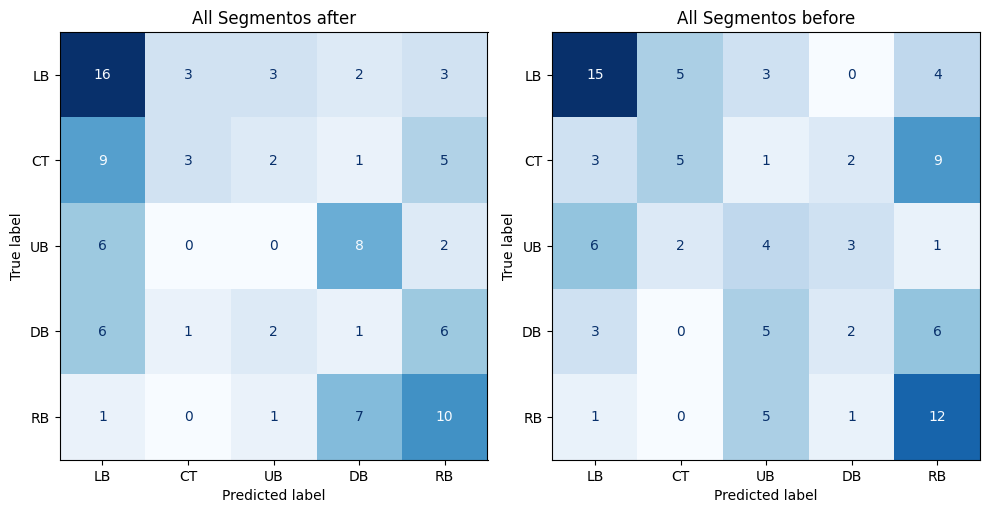

In [90]:
datos_lstm_sw = pd.DataFrame(accuracy_score_lstm_sw, columns=['LSTM_SW_VAL'], index=(titulos_all_sw))

display(datos_lstm_sw)

mc_lstm = []

for matrices_lstm in matriz_confusion_lstm_sw:

    mc_lstm.append(pd.DataFrame(matrices_lstm, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en 2 subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_lstm[0], mc_lstm[1]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all_sw)):

    ax = axs[i]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

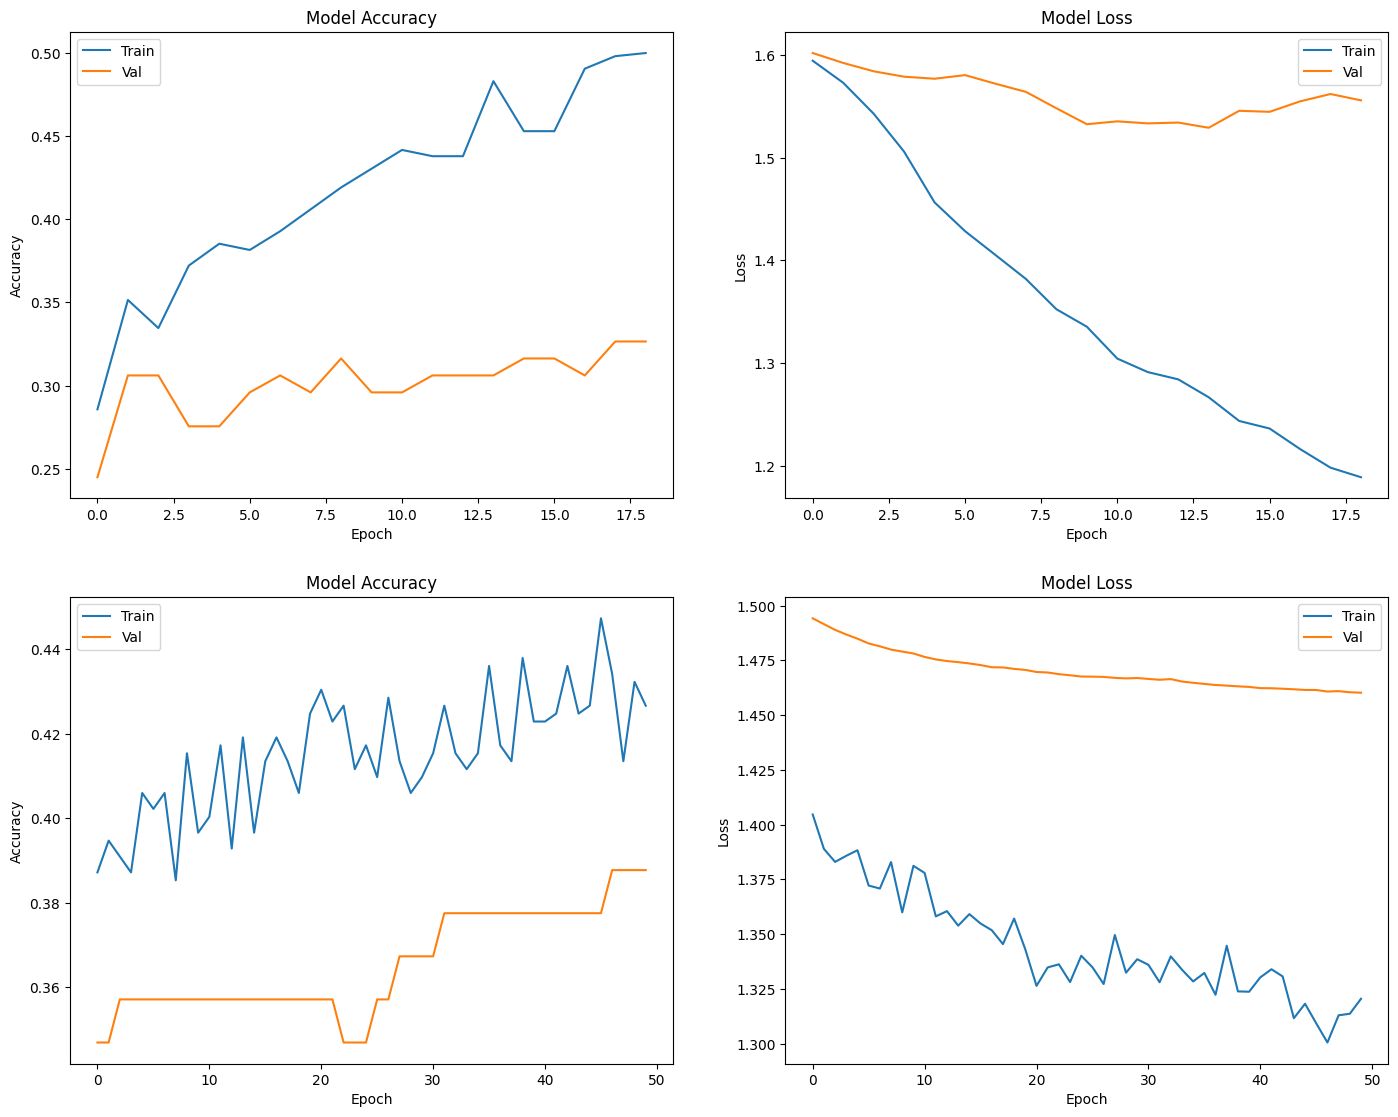

In [91]:
# Crear una figura con 4 subgráficos (2 filas y 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Asegurarse de que haya suficiente espacio entre los subgráficos
plt.tight_layout(pad=5.0)

# Alternar entre 'loss' y 'accuracy' para cada par de subgráficos
for idx, history in enumerate(total_simple_lstm_sw_trained[:4]):
    i, j = divmod(idx * 2, 2)
    # Imprimir la gráfica de pérdida en el primer subgráfico del par
    print_chart(axes[i, j], "Model Accuracy", "Epoch", "Accuracy", 
            [history.history['accuracy'], history.history['val_accuracy']], ['Train', 'Val'])
    
    # Imprimir la gráfica de precisión (accuracy) en el segundo subgráfico del par
    i, j = divmod(idx * 2 + 1, 2)
    print_chart(axes[i, j], "Model Loss", "Epoch", "Loss", 
                [history.history['loss'], history.history['val_loss']], ['Train', 'Val'])

# Mostrar todas las gráficas en una sola figura
plt.show()

,LSTM_SW_TEST
All Segmentos after,0.444444
All Segmentos before,0.277778


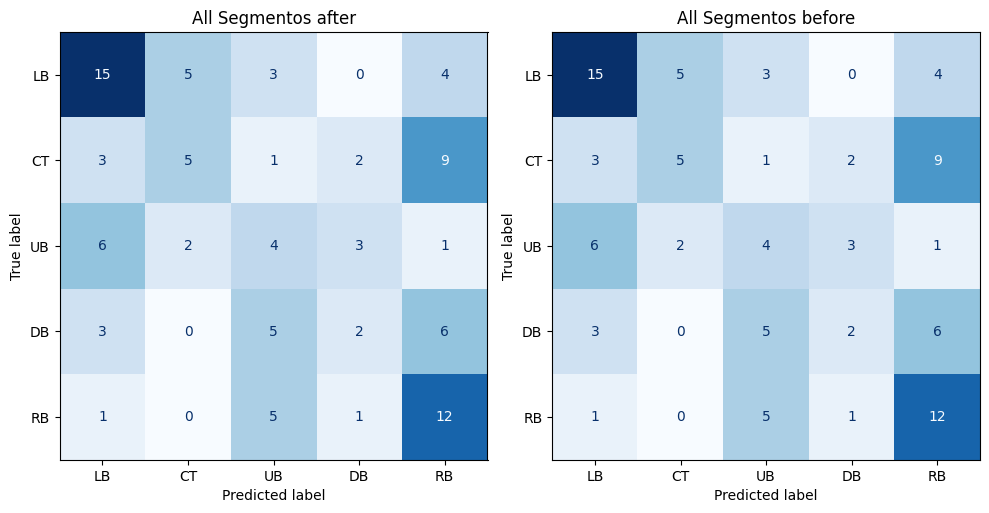

In [92]:
datos_lstm_sw_test = pd.DataFrame(accuracy_score_test_lstm_sw, columns=['LSTM_SW_TEST'], index=(titulos_all_sw))

display(datos_lstm_sw_test)

mc_lstm = []

for matrices_srnn in matriz_confusion_test_lstm_sw:

    mc_lstm.append(pd.DataFrame(matrices_lstm, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_lstm[0], mc_lstm[1]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all_sw)):

    ax = axs[i]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

In [93]:
datos_lstm_sw_test.to_csv(f'../datos/csv/datosEGG_LSTM_SW_test.csv', index=False)
datos_lstm_sw.to_csv(f'../datos/csv/datosEGG_LSTM_SW_val.csv', index=False)